In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def m_alpha(V):
    return -0.1*(V+23)/(np.exp(-0.1*(V+23))-1)
def m_beta(V):
    return 4*np.exp(-(V+48)/18)
def minf(V):     
    alpha = m_alpha(V)
    beta = m_beta(V)
    return alpha / (alpha + beta)
def taum(V):
    return 1/(m_alpha(V)+m_beta(V))

def h_alpha(V):
    return 0.07 * np.exp(-(V+37)/20)
def h_beta(V):
    return 1/(np.exp(-0.1*(V+7))+1)
def hinf(V):     
    alpha = h_alpha(V)
    beta = h_beta(V)
    return alpha / (alpha + beta)
def tauh(V):
    return 1/(h_alpha(V)+h_beta(V))

def n_alpha(V):
    return -0.01*(V+27)/(np.exp(-0.1*(V+27))-1)
def n_beta(V):
    return 0.125*np.exp(-(V+37)/80)
def ninf(V):     
    alpha = n_alpha(V)
    beta = n_beta(V)
    return alpha / (alpha + beta)
def taun(V):
    return 1/(n_alpha(V)+n_beta(V))

def p_alpha(V):
    return 1/(0.15*(1+np.exp(-(V+38)/6.5)))
def p_beta(V):
    return np.exp(-(V+38)/6.5)/(0.15*(1+np.exp(-(V+38)/6.5)))
def pinf(V):     
    alpha = p_alpha(V)
    beta = p_beta(V)
    return alpha / (alpha + beta)
def taup(V):
    return 1/(p_alpha(V)+p_beta(V))

def rfinf(V):
    return 1 / (1+np.exp((V+79.2)/9.78))
def taurf(V):
    return 0.51 / (np.exp((V-1.7)/10)+np.exp(-(V+340)/52))+1

def rsinf(V):
    return 1 / (1+np.exp((V+2.83)/15.9))**58
def taurs(V):
    return 5.6/(np.exp((V-1.7)/14)+np.exp(-(V+260)/43))+1

# Define the membrane potential range
V = np.linspace(-100, 50, 500)


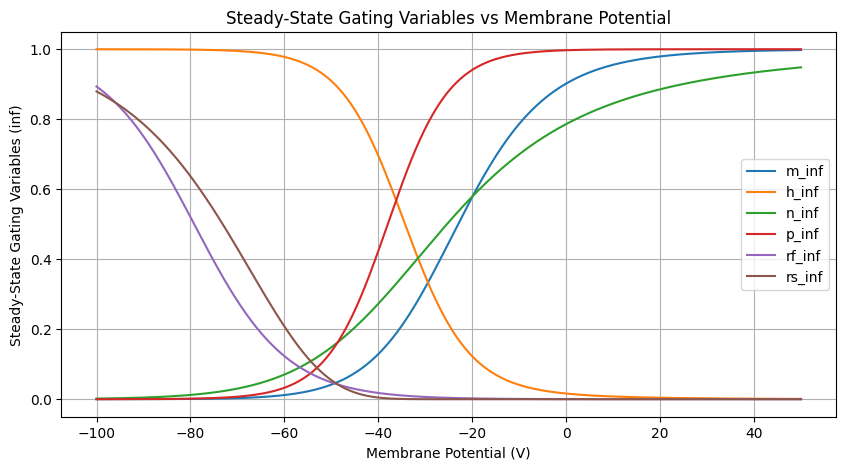

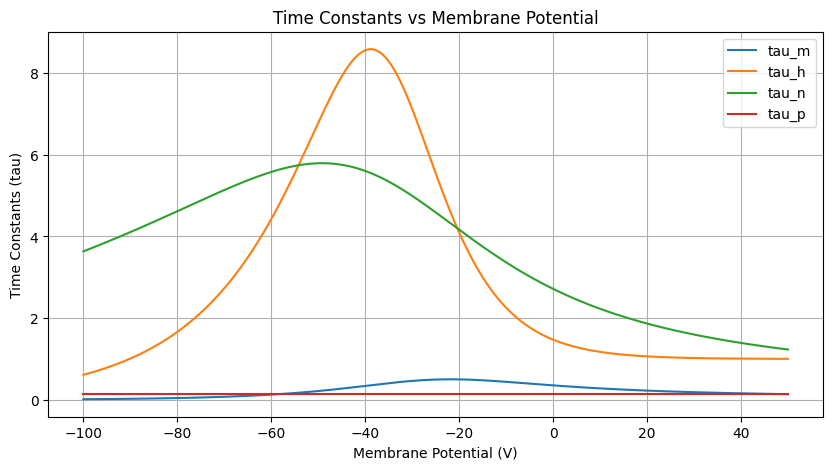

In [3]:
# Calculate all the steady-state (inf) and time constant (tau) functions
minf_vals = minf(V)
hinf_vals = hinf(V)
ninf_vals = ninf(V)
pinf_vals = pinf(V)
rfinf_vals = rfinf(V)
rsinf_vals = rsinf(V)

taum_vals = taum(V)
tauh_vals = tauh(V)
taun_vals = taun(V)
taup_vals = taup(V)
taurf_vals = taurf(V)
taurs_vals = taurs(V)

# Plot all the inf values on one graph
plt.figure(figsize=(10, 5))
plt.plot(V, minf_vals, label="m_inf")
plt.plot(V, hinf_vals, label="h_inf")
plt.plot(V, ninf_vals, label="n_inf")
plt.plot(V, pinf_vals, label="p_inf")
plt.plot(V, rfinf_vals, label="rf_inf")
plt.plot(V, rsinf_vals, label="rs_inf")

plt.xlabel("Membrane Potential (V)")
plt.ylabel("Steady-State Gating Variables (inf)")
plt.title("Steady-State Gating Variables vs Membrane Potential")
plt.legend()
plt.grid(True)

# Plot all the tau values on another graph
plt.figure(figsize=(10, 5))
plt.plot(V, taum_vals, label="tau_m")
plt.plot(V, tauh_vals, label="tau_h")
plt.plot(V, taun_vals, label="tau_n")
plt.plot(V, taup_vals, label="tau_p")
#plt.plot(V, taurf_vals, label="tau_rf")
#plt.plot(V, taurs_vals, label="tau_rs")

plt.xlabel("Membrane Potential (V)")
plt.ylabel("Time Constants (tau)")
plt.title("Time Constants vs Membrane Potential")
plt.legend()
plt.grid(True)

# Show the plots
plt.show()

In [4]:
def simulator_HH():

    Gk = 11
    Ek = -90
    Gl = 0.5
    El = -65
    Gh = 1.5
    Eh = -20 #32.9
    Gna = 52
    Ena = 55
    Gp = 0.5
    dt = 0.01
    t = np.arange(0,1000,.01)
    V = np.zeros(len(t))
    h = np.zeros(len(t))
    H = np.zeros(len(t))
    m = np.zeros(len(t))
    n = np.zeros(len(t))
    rf = np.zeros(len(t))
    rs = np.zeros(len(t))
    p = np.zeros(len(t))

    I = np.zeros(len(t))

    I = 2.51

    V[0] = -70
    for j in range(len(t)-1):
        k1V = -Gl * (V[j] - El) -Gna*(m[j]**3)*h[j]*(V[j]-Ena) - Gk * n[j]**4 * (V[j] - Ek) - Gp * p[j] * (V[j] - Ena) - Gh * (0.65*rf[j]+0.35*rs[j]) * (V[j]-Eh) + I
        

        k1h = (hinf(V[j]) - h[j]) / tauh(V[j])
        k1m = (minf(V[j]) - m[j]) / taum(V[j])
        k1n = (ninf(V[j]) - n[j]) / taun(V[j])
        k1p = (pinf(V[j]) - p[j]) / taup(V[j])
        k1rf = (rfinf(V[j]) - rf[j]) / taurf(V[j])
        k1rs = (rsinf(V[j]) - rs[j]) / taurs(V[j])
        

        am = m[j] + k1m * dt
        ap = p[j] + k1p * dt
        an = n[j] + k1n * dt
        av = V[j] + k1V * dt
        ah = h[j] + k1h * dt
        arf = rf[j] + k1rf * dt
        ars = rs[j] + k1rs * dt
        

        k2V = -Gl * (av - El)  -Gna*(am**3)*ah*(av-Ena) - Gk * an**4 * (av - Ek) - Gp * ap * (av - Ena) - Gh * (0.65*arf+0.35*ars) * (av-Eh) + I
        

        k2h = (hinf(av) - ah) / tauh(av)
        k2m = (minf(av) - am) / taum(av)
        k2n = (ninf(av) - an) / taun(av)
        k2p = (pinf(av) - ap) / taup(av)
        k2rf = (rfinf(av) - arf) / taurf(av)
        k2rs = (rsinf(av) - ars) / taurs(av)

        n[j + 1] = n[j] + (k1n + k2n) * dt / 2
        m[j + 1] = m[j] + (k1m + k2m) * dt / 2
        p[j + 1] = p[j] + (k1p + k2p) * dt / 2
        rf[j + 1] = rf[j] + (k1rf + k2rf) * dt / 2
        rs[j + 1] = rs[j] + (k1rs + k2rs) * dt / 2

        V[j+1] = V[j] + (k1V + k2V) * dt / 2
        h[j+1] = h[j] + (k1h + k2h) * dt / 2
   

    return np.array(V).reshape(-1,1),np.array(rs).reshape(-1,1),np.array(I).reshape(-1,1)

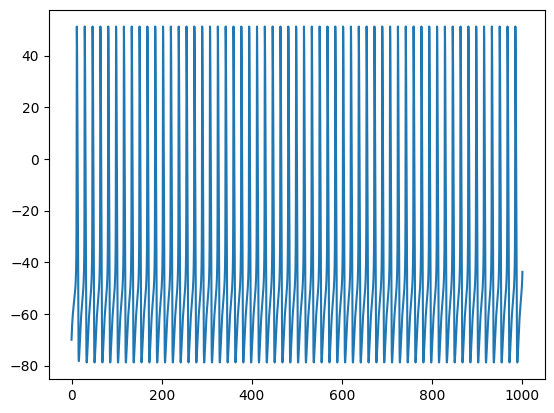

In [5]:
t = np.arange(0,1000,0.01)

V,rs,I = simulator_HH()
#plt.xlim(20,80)
plt.plot(t,V)

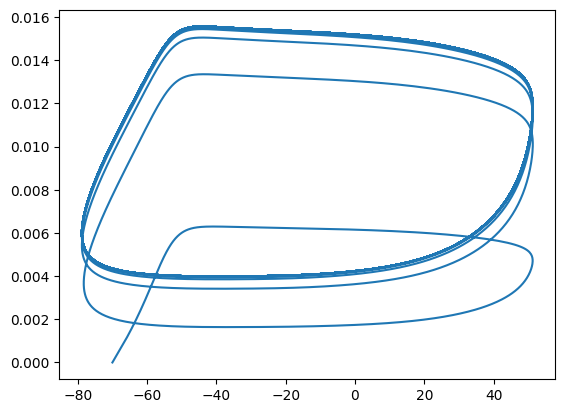

In [6]:
plt.plot(V,rs)

C:\Users\Josh\AppData\Local\Temp\ipykernel_11804\2426412339.py:13: RuntimeWarning: overflow encountered in exp
  return 0.07 * np.exp(-(V+37)/20)
C:\Users\Josh\AppData\Local\Temp\ipykernel_11804\2426412339.py:15: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp(-0.1*(V+7))+1)
C:\Users\Josh\AppData\Local\Temp\ipykernel_11804\2426412339.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return alpha / (alpha + beta)
C:\Users\Josh\AppData\Local\Temp\ipykernel_11804\2426412339.py:2: RuntimeWarning: overflow encountered in exp
  return -0.1*(V+23)/(np.exp(-0.1*(V+23))-1)
C:\Users\Josh\AppData\Local\Temp\ipykernel_11804\2426412339.py:4: RuntimeWarning: overflow encountered in exp
  return 4*np.exp(-(V+48)/18)
C:\Users\Josh\AppData\Local\Temp\ipykernel_11804\2790556704.py:80: RuntimeWarning: divide by zero encountered in scalar divide
  k1m = (minf(V[j]) - m[j]) / taum(V[j])
C:\Users\Josh\AppData\Local\Temp\ipykernel_11804\2426412339.py:24: RuntimeWarning: overf

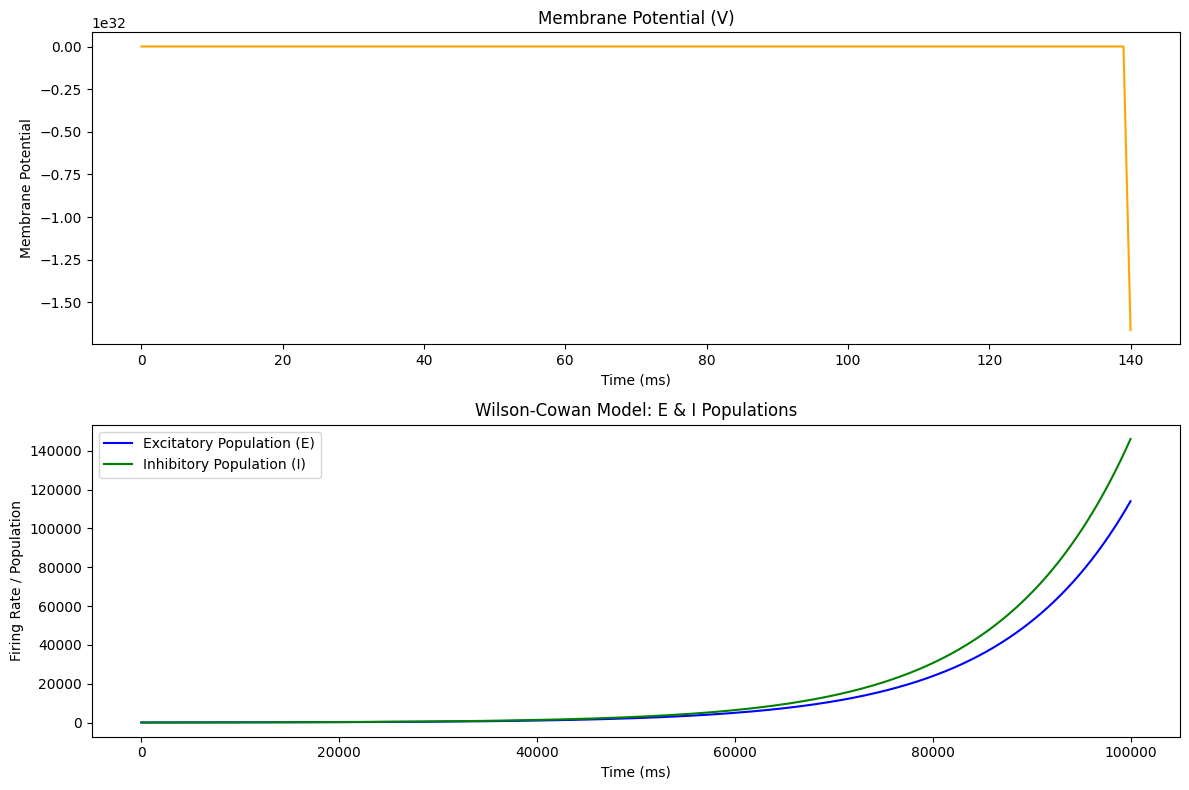

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def piecewise_constant_white_noise(t, Tdur, D, seed=None):
    if seed is not None:
        np.random.seed(seed)  # Set the random seed for reproducibility
    eta = np.random.randn(len(t))
    Ieta = np.zeros(len(t))
    for i in range(len(t)):
        Ieta[i] = eta[int(t[i] / Tdur)]
    return np.sqrt(D) * Ieta

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def simulator_HH_WC(Tdur= 1, D=10):
    Gk = 11
    Ek = -90
    Gl = 0.5
    El = -65
    Gh = 1.5
    Eh = -20
    Gna = 52
    Ena = 55
    Gp = 0.5
    dt = 0.01
    t = np.arange(0, 1000, dt)

    c1 = .2
    c2 = -.2
    c3 = .1
    c4 = -.2
    P = 0 
    Q = 0
    re = 1
    ri = 1
    ki = 1
    ke = 1

    V = np.zeros(len(t))
    h = np.zeros(len(t))
    m = np.zeros(len(t))
    n = np.zeros(len(t))
    rf = np.zeros(len(t))
    rs = np.zeros(len(t))
    p = np.zeros(len(t))
    I = np.zeros(len(t))

    I[0] = -2.51
    V[0] = -70

    WEE = 1
    WEI = 0.5
    WIE = -0.5
    WII = -1
    I0 = 1

    tau_E = 20
    tau_I = 20

    E = np.zeros(len(t))
    I_pop = np.zeros(len(t))
    E[0] = .2
    I_pop[0] = .8
    noise = piecewise_constant_white_noise(t, Tdur, D)
    for j in range(len(t)-1):
        fE = sigmoid(E[j])
        fI = sigmoid(I_pop[j])

        # dE = (-E[j] + (WEE * fE + WEI * fI + I0))/tau_E
        # dI = (-I_pop[j] + (WIE * fE + WII * fI + I0))/tau_I

        k1V = -Gl * (V[j] - El) - Gna * (m[j]**3) * h[j] * (V[j] - Ena) - Gk * n[j]**4 * (V[j] - Ek) - Gp * p[j] * (V[j] - Ena) - Gh * (0.65 * rf[j] + 0.35 * rs[j]) * (V[j] - Eh) + I_pop[j] + E[j] +noise[j]

        K1dE = (-E[j]*c1 + I_pop[j]*c2 + E[j]*c3) /tau_E
        K1dI = (E[j]*c1 - I_pop[j]*c2  + I_pop[j]*c4) /tau_I
        
        k1h = (hinf(V[j]) - h[j]) / tauh(V[j])
        k1m = (minf(V[j]) - m[j]) / taum(V[j])
        k1n = (ninf(V[j]) - n[j]) / taun(V[j])
        k1p = (pinf(V[j]) - p[j]) / taup(V[j])
        k1rf = (rfinf(V[j]) - rf[j]) / taurf(V[j])
        k1rs = (rsinf(V[j]) - rs[j]) / taurs(V[j])

        am = m[j] + k1m * dt
        ap = p[j] + k1p * dt
        an = n[j] + k1n * dt
        av = V[j] + k1V * dt
        ah = h[j] + k1h * dt
        arf = rf[j] + k1rf * dt
        ars = rs[j] + k1rs * dt

        ade = E[j] + K1dE * dt
        adi = I_pop[j] + K1dI * dt

        k2V = -Gl * (av - El) - Gna * (am**3) * ah * (av - Ena) - Gk * an**4 * (av - Ek) - Gp * ap * (av - Ena) - Gh * (0.65 * arf + 0.35 * ars) * (av - Eh) + adi + ade+noise[j]
        k2h = (hinf(av) - ah) / tauh(av)
        k2m = (minf(av) - am) / taum(av)
        k2n = (ninf(av) - an) / taun(av)
        k2p = (pinf(av) - ap) / taup(av)
        k2rf = (rfinf(av) - arf) / taurf(av)
        k2rs = (rsinf(av) - ars) / taurs(av)

        K2dE = (-ade*c1 + adi*c2 + ade*c3)/tau_E
        K2dI = (ade*c1 - adi*c2 + adi*c4 )/tau_I

        n[j + 1] = n[j] + (k1n + k2n) * dt / 2
        m[j + 1] = m[j] + (k1m + k2m) * dt / 2
        p[j + 1] = p[j] + (k1p + k2p) * dt / 2
        rf[j + 1] = rf[j] + (k1rf + k2rf) * dt / 2
        rs[j + 1] = rs[j] + (k1rs + k2rs) * dt / 2

        V[j + 1] = V[j] + (k1V + k2V) * dt / 2
        h[j + 1] = h[j] + (k1h + k2h) * dt / 2

        E[j + 1] = E[j] + (K1dE+K2dE) * dt / 2
        I_pop[j + 1] = I_pop[j] + (K1dI + K2dI) * dt/ 2

    return np.array(V).reshape(-1, 1), np.array(rs).reshape(-1, 1), np.array(I).reshape(-1, 1), np.array(E).reshape(-1, 1), np.array(I_pop).reshape(-1, 1)

V, rs, I, E, I_pop = simulator_HH_WC()

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(V, label="Membrane Potential (V)", color='orange')
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential")
plt.title("Membrane Potential (V)")

plt.subplot(2, 1, 2)
plt.plot(E, label="Excitatory Population (E)", color='b')
plt.plot(I_pop, label="Inhibitory Population (I)", color='g')
plt.xlabel("Time (ms)")
plt.ylabel("Firing Rate / Population")
plt.legend()
plt.title("Wilson-Cowan Model: E & I Populations")

plt.tight_layout()
plt.show()


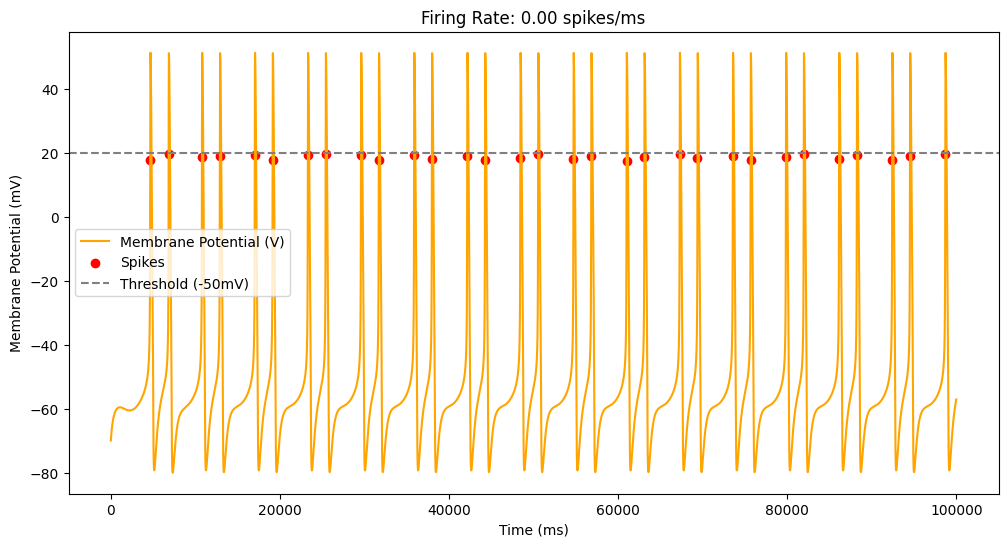

0.00031407353373251066


In [117]:
def calculate_firing_rate(V, threshold=20):

    spikes = np.where((V[:-1] < threshold) & (V[1:] >= threshold))[0]
    

    spike_times = spikes   
    

    firing_rate = len(spikes) / (spike_times[-1] if len(spike_times) > 0 else 1)  # spikes per ms
    
    return firing_rate, spike_times 


firing_rate, spike_times = calculate_firing_rate(V)


plt.figure(figsize=(12, 6))
plt.plot(V, label="Membrane Potential (V)", color='orange')
plt.scatter(spike_times, V[spike_times.astype(int)], color='red', label="Spikes")
plt.axhline(y=20, color='gray', linestyle='--', label="Threshold (-50mV)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.title(f"Firing Rate: {firing_rate:.2f} spikes/ms")
plt.show()
print(firing_rate)


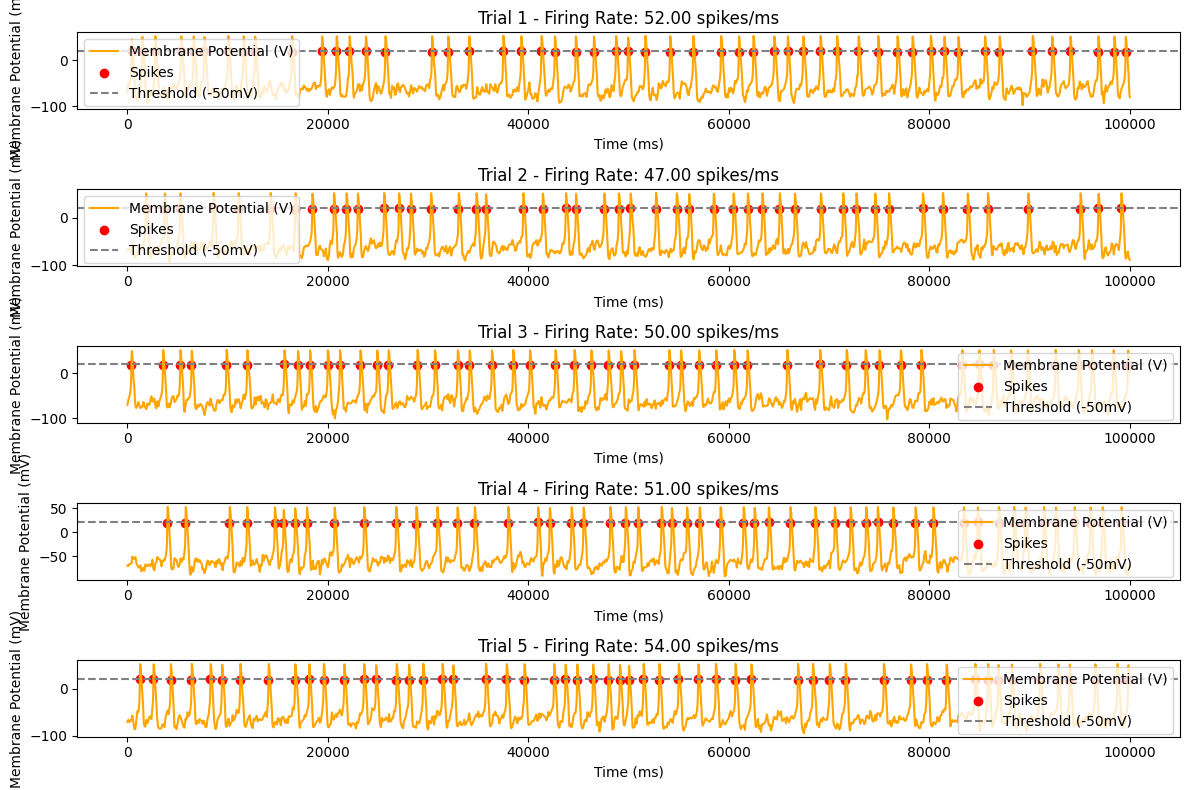

Mean Firing Rate: 50.80 spikes/ms
Standard Deviation of Firing Rate: 2.32 spikes/ms
Coefficient of Variation (CV) of Firing Rate: 0.05


In [124]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_firing_rate(V, threshold=20, total_time=None):
   
    spikes = np.where((V[:-1] < threshold) & (V[1:] >= threshold))[0]
    
   
    spike_times = spikes  
    

    total_time = total_time if total_time is not None else (len(V) * dt)
    
  
    firing_rate = len(spikes) / (total_time / 1000)
    
    return firing_rate, spike_times  


num_trials = 5
firing_rates = []

plt.figure(figsize=(12, 8))

for trial in range(num_trials):
    V, rs, I, E, I_pop = simulator_HH_WC()  
    
    
    firing_rate, spike_times = calculate_firing_rate(V)
    firing_rates.append(firing_rate)
    

    plt.subplot(num_trials, 1, trial + 1)
    plt.plot(V, label="Membrane Potential (V)", color='orange')
    plt.scatter(spike_times, V[spike_times.astype(int)], color='red', label="Spikes")
    plt.axhline(y=20, color='gray', linestyle='--', label="Threshold (-50mV)")
    plt.xlabel("Time (ms)")
    plt.ylabel("Membrane Potential (mV)")
    plt.legend()
    plt.title(f"Trial {trial+1} - Firing Rate: {firing_rate:.2f} spikes/ms")

plt.tight_layout()
plt.show()


mean_firing_rate = np.mean(firing_rates)
std_firing_rate = np.std(firing_rates)


cv_firing_rate = std_firing_rate / mean_firing_rate


print(f"Mean Firing Rate: {mean_firing_rate:.2f} spikes/ms")
print(f"Standard Deviation of Firing Rate: {std_firing_rate:.2f} spikes/ms")
print(f"Coefficient of Variation (CV) of Firing Rate: {cv_firing_rate:.2f}")


<Figure size 1200x800 with 0 Axes>

Mean Firing Rate: 51.28 spikes/ms
Standard Deviation of Firing Rate: 2.55 spikes/ms
Coefficient of Variation (CV) of Firing Rate: 0.05


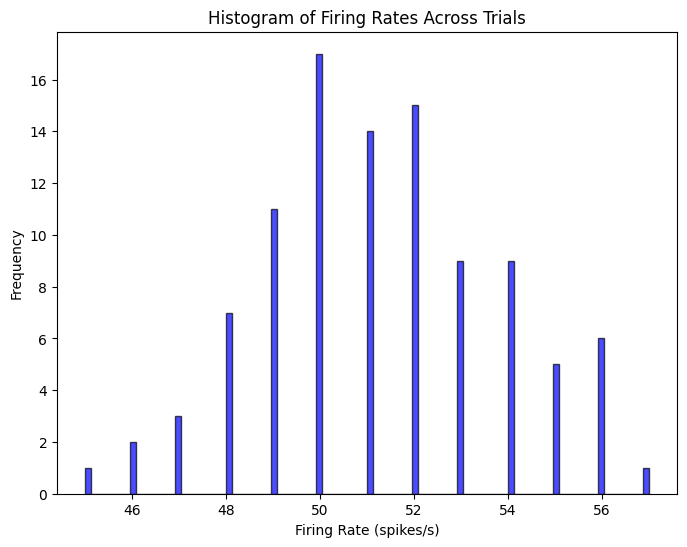

In [126]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_firing_rate(V, dt=0.01, threshold=20, total_time=None):

    spikes = np.where((V[:-1] < threshold) & (V[1:] >= threshold))[0]
    
    if len(spikes) == 0:
        return 0, []  
 
    spike_times = spikes   
    
    total_time = total_time if total_time is not None else (len(V) * dt)
    
  
    firing_rate = len(spikes) / (total_time / 1000)  
    
    return firing_rate, spike_times  


num_trials = 100
firing_rates = []


plt.figure(figsize=(12, 8))

for trial in range(num_trials):
    V, rs, I, E, I_pop = simulator_HH_WC() 
    
  
    firing_rate, spike_times = calculate_firing_rate(V)
    firing_rates.append(firing_rate)
    
 
    # plt.subplot(num_trials, 1, trial + 1)
    # plt.plot(V, label="Membrane Potential (V)", color='orange')
    # plt.scatter(spike_times, V[spike_times.astype(int)], color='red', label="Spikes")
    # plt.axhline(y=20, color='gray', linestyle='--', label="Threshold (-50mV)")
    # plt.xlabel("Time (ms)")
    # plt.ylabel("Membrane Potential (mV)")
    # plt.legend()
    # plt.title(f"Trial {trial+1} - Firing Rate: {firing_rate:.2f} spikes/ms")

plt.tight_layout()
plt.show()


mean_firing_rate = np.mean(firing_rates)
std_firing_rate = np.std(firing_rates)


cv_firing_rate = std_firing_rate / mean_firing_rate


print(f"Mean Firing Rate: {mean_firing_rate:.2f} spikes/ms")
print(f"Standard Deviation of Firing Rate: {std_firing_rate:.2f} spikes/ms")
print(f"Coefficient of Variation (CV) of Firing Rate: {cv_firing_rate:.2f}")

plt.figure(figsize=(8, 6))
plt.hist(firing_rates, bins=100, color='b', edgecolor='black', alpha=0.7)
plt.xlabel("Firing Rate (spikes/s)")
plt.ylabel("Frequency")
plt.title("Histogram of Firing Rates Across Trials")
plt.show()


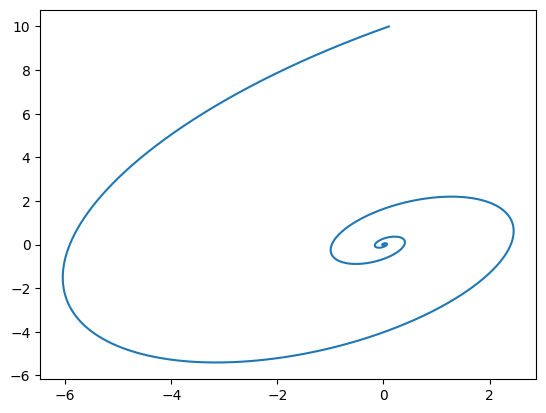

In [8]:
plt.plot(E,I_pop)

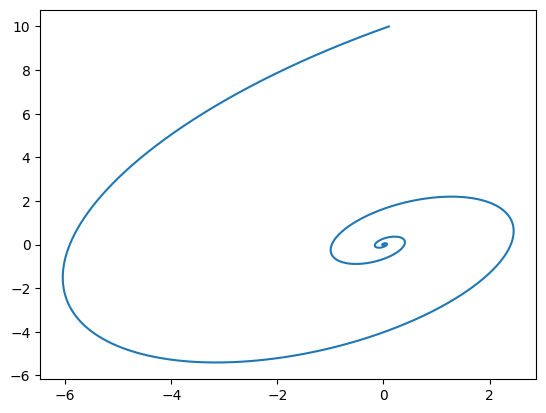

In [9]:
plt.plot(E,I_pop)